In [ ]:
pip install mysql-connector-python

In [3]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    
    query="SHOW DATABASES"
    
    cursor= mydb.cursor()
    cursor.execute(query)
    print(cursor.fetchall())

except Exception as e:
    mydb.close()
    print(e)
    

[('information_schema',), ('mysql',), ('new_schema',), ('performance_schema',), ('sys',)]


In [60]:
import mysql.connector as connection
conn=connection.connect(host="localhost",user="root",passwd="Shubham@123#",use_pure=True)

In [30]:
##cursor will help to point out to excecute queries
cur=conn.cursor()
cur.execute("show databases")
response=cur.fetchall() ## this is the same response which we get in mysql workbench after running show database command
response

[('information_schema',),
 ('mysql',),
 ('new_schema',),
 ('performance_schema',),
 ('sys',)]

In [53]:
cur=conn.cursor()
cur.execute("CREATE DATABASE FirstDatabase1")

In [61]:
cur=conn.cursor()
cur.execute("Show Databases")
response=cur.fetchall()
response

[('FirstDatabase',),
 ('FirstDatabase1',),
 ('information_schema',),
 ('mydatabase',),
 ('mysql',),
 ('new_schema',),
 ('performance_schema',),
 ('sys',)]

## Access the databases that we have created now and create table inside that database

In [63]:
##Access the databases that we have created now and create table inside that database
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    
    query="CREATE TABLE StudentDetails (StudentId INT(10) AUTO_INCREMENT PRIMARY KEY, FirstName VARCHAR(60)," \
          "LastName VARCHAR(60), RegistrationDate DATE, Class VARCHAR(20),Section VARCHAR(10))"        
    
    cursor= mydb.cursor()
    cursor.execute(query)
    print("Table Created")
    mydb.commit()
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

Table Created


In [78]:
mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)

In [74]:
## To check if connection is proper
mydb.is_connected()

True

In [80]:
## Create A TABLE name FirstTable
cur=mydb.cursor()
cur.execute("create table tablename_test(X1 INT(5), X2 VARCHAR(20), X3 DATE)")
mydb.commit()
mydb.close()

## Insert Value into table that we have created

In [86]:
##Access the databases that we have created now and create table inside that database
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    
    query="INSERT INTO StudentDetails VALUES ('1132','Sachin','Kumar','1997-11-11','Eleventh','A')"
    
    cursor= mydb.cursor()
    cursor.execute(query)
    print("Table Created")
    mydb.commit()
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

Table Created


In [87]:
mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)

In [88]:
cur=mydb.cursor()
cur.execute("insert into tablename_test value(123,'TestX2','2021-05-15')")
## but if you will got to workbench you still would not see data inside table
'''use FirstDatabase;
SELECT * FROM tablename_test;'''

In [89]:
## Hence you should commit and check again if data is inserted into table
mydb.commit()

In [90]:
## Insert second rows
cur.execute("insert into tablename_test value(1234,'Test1X2','2021-06-15')")
mydb.commit()

In [92]:
## Fetch data from database
##Access the databases that we have created now and create table inside that database
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    print(mydb.is_connected())
    query= "SELECT * FROM StudentDetails"
    
    cursor= mydb.cursor()
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.commit()
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
(1132, 'Sachin', 'Kumar', datetime.date(1997, 11, 11), 'Eleventh', 'A')


In [94]:
mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)
cur=mydb.cursor()
cur.execute("SELECT * FROM tablename_test")

for i in cur.fetchall():
    print(i)

(123, 'TestX2', datetime.date(2021, 5, 15))
(1234, 'Test1X2', datetime.date(2021, 6, 15))


In [95]:
## select only 2 columns
mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)
cur=mydb.cursor()
cur.execute("SELECT X1,X2 FROM tablename_test")

for i in cur.fetchall():
    print(i)
mydb.close()

(123, 'TestX2')
(1234, 'Test1X2')


## Connect SQL With Pandas

In [98]:
import pandas as pd
mydb = connection.connect(host="localhost",database="FirstDatabase",user="root",passwd="Shubham@123#",use_pure=True)
mydb.is_connected()

True

In [101]:
## READ DATA 
df=pd.read_sql("select * from FirstDatabase.StudentDetails",mydb)
df

,StudentId,FirstName,LastName,RegistrationDate,Class,Section
0,1132,Sachin,Kumar,1997-11-11,Eleventh,A


In [116]:
df=pd.read_sql("select X1,X3 from FirstDatabase.tablename_test",mydb)
df

,X1,X3
0,123,2021-05-15
1,1234,2021-06-15


In [117]:
Name=["Shubham","Pramod","Parth"]
Age=[26, 24, 33]
Sex=["Male","Male","Male"]
df=pd.DataFrame({"Name":Name,"Age":Age,"Sex":Sex})
df.head()

,Name,Age,Sex
0,Shubham,26,Male
1,Pramod,24,Male
2,Parth,33,Male


In [118]:
df.to_csv("EmpData.csv")
df=pd.read_csv("EmpData.csv")

#### Write data from csv into sql

In [151]:
import mysql.connector as connection
import pandas as pd
import csv

In [217]:
## Create a Dataframe and save into CSV
Name=["Shubham","Pramod","Parth"]
Age=[26, 24, 33]
Sex=["Male","Male","Male"]
df=pd.DataFrame({"Name":Name,"Age":Age,"Sex":Sex})
df.to_csv("EmpData.csv",index=False,header=False)
df=pd.read_csv("EmpData.csv",names=["Name","Age","Sex"])
df.head()

,Name,Age,Sex
0,Shubham,26,Male
1,Pramod,24,Male
2,Parth,33,Male


In [207]:
## Create A Table FirstDatabase.Empdata 
mydb=connection.connect(host="localhost",user="root",passwd="Shubham@123#",use_pure=True)
cur= mydb.cursor()
cur.execute("create table FirstDatabase.Empdata (Name VARCHAR(10), Age INT(5), Sex VARCHAR(5))")

In [208]:
## Read Empdata.csv and push into table Empdata
with open("EmpData.csv") as file:
    data=csv.reader(file)
    for line in data:
        cur.execute("INSERT INTO FirstDatabase.Empdata VALUES {values}".format(values=tuple(line)))
mydb.commit()
mydb.close()

In [216]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",database="FirstDatabase1",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    print(mydb.is_connected())
    query= "CREATE TABLE IF NOT EXISTS EmployeeData (Name VARCHAR(10), Age INT(5), Sex VARCHAR(5))"
    cursor= mydb.cursor()
    cursor.execute(query)
    print("Table Created")
    
    ## read from file
    with open("EmpData.csv") as file:
        data=csv.reader(file)
        for line in data:
            cursor.execute("INSERT INTO FirstDatabase1.EmployeeData VALUES {values}".format(values=tuple(line)))
        print("Value Inserted")
        mydb.commit()
        cursor.close()
        mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Table Created
Value Inserted


In [222]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",database="FirstDatabase1",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    print(mydb.is_connected())
    query= "CREATE TABLE IF NOT EXISTS EmployeeData1 (Name VARCHAR(10), Age INT(5), Sex VARCHAR(5))"
    cursor= mydb.cursor()
    cursor.execute(query)
    print("Table Created")
    
    ## read from file
    with open("EmpData.csv") as file:
        data=csv.reader(file)
        for line in data:
            cursor.execute("INSERT INTO FirstDatabase1.EmployeeData1 VALUES {values}".format(values=tuple(line)))
        print("Value Inserted")
        mydb.commit()
        cursor.close()
        mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Table Created
Value Inserted


## Exercise

In [290]:
df=pd.read_csv("carbon_nanotubes.csv",delimiter=";")
df.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [284]:
df["Initial atomic coordinate u"]=df["Initial atomic coordinate u"].str.split(",",expand=True)[1]

In [288]:
## remove the leading with zeris from all col by comma separated

columns=["Initial atomic coordinate u","Initial atomic coordinate v","Initial atomic coordinate w","Calculated atomic coordinates u'",
         "Calculated atomic coordinates v'","Calculated atomic coordinates w'"]
def split_col(df,columns):
    for column in columns:
        df[column]=df[column].str.split(",",expand=True)[1]

In [291]:
split_col(df,columns)

In [294]:
for i in columns:
    df[i]=pd.to_numeric(df[i])

In [314]:
df.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,679005,701318,17033,721039,730232,17014.0
1,2,1,717298,642129,231319,738414,65675,232369.0
2,2,1,489336,303751,88462,477676,263221,88712.0
3,2,1,413957,632996,40843,408823,657897,39796.0
4,2,1,334292,543401,15989,303349,558807,157373.0


In [297]:
df.to_csv("carbon_nanotubes_filtered.csv",header=False,index=False)

In [67]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",database="FirstDatabase1",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    print(mydb.is_connected())
    query= "CREATE TABLE IF NOT EXISTS carbon_nanotubes3 (Chiral_indice_n INT(5), Chiral_indice_m INT(5)," \
           "Initial_atomic_coordinate_u INT(10), Initial_atomic_coordinate_v INT(10), Initial_atomic_coordinate_w INT(10)," \
           "Calculated_atomic_coordinates_u INT(10), Calculated_atomic_coordinates_v INT(10),Calculated_atomic_coordinates_w VARCHAR(10))"
    cursor= mydb.cursor()
    cursor.execute(query)
    print("Table Created")
    
    ## read from file
    with open("carbon_nanotubes_filtered.csv") as file:
        data=csv.reader(file)
        for line in data:
            cursor.execute("INSERT INTO FirstDatabase1.carbon_nanotubes2 VALUES {values}".format(values=tuple(line)))
        print("Value Inserted")
        mydb.commit()
        cursor.close()
        mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Table Created
Value Inserted


### Exercise_Second_Approach

In [40]:
import csv
file_in_list=[]

with open("carbon_nanotubes.csv") as file:
    data=csv.reader(file,delimiter ="\n")
    for i in data:
        file_in_list.append(i[0].split(";"))

In [42]:
## write updated data into csv

with open("carbon_nanotubes_updated.csv","w",newline="") as file:
    data=csv.writer(file)
    data.writerows(file_in_list)

In [30]:
# Create A Database

import mysql.connector as connection
try:
    mydb = connection.connect(host="localhost",user="root",passwd="Shubham@123#",use_pure=True)
    ## check if connection is established
    print(mydb.is_connected())
    cursor = mydb.cursor()
    query= "CREATE DATABASE Excercise_"
    cursor.execute(query)
    print("Database Created")
except Exception as e:
    mydb.close()
    print(str(e))

True
Database Created


In [34]:
# Create A Table

mydb = connection.connect(host="localhost",database="Excercise_",user="root",passwd="Shubham@123#",use_pure=True)
cursor = mydb.cursor()
query2= "CREATE TABLE IF NOT EXISTS Excercise_CSV (Chiral_indice_n INT, Chiral_indice_m INT," \
           "Initial_atomic_coordinate_u VARCHAR(20), Initial_atomic_coordinate_v VARCHAR(20), Initial_atomic_coordinate_w VARCHAR(20)," \
           "Calculated_atomic_coordinates_u VARCHAR(20), Calculated_atomic_coordinates_v VARCHAR(10),Calculated_atomic_coordinates_w VARCHAR(10))"    
cursor.execute(query2)
print("Table Is Created")

Table Is Created


In [59]:
# Insert Data Into Table

with open("carbon_nanotubes_updated.csv") as file:
    data_csv=csv.reader(file,delimiter="\n")
    next(data_csv)
    for j in data_csv:
        query ="INSERT INTO Excercise_.Excercise_CSV values ({});".format(",".join(j))
        cursor.execute(query)

In [66]:
## Table looks like
mydb.commit()

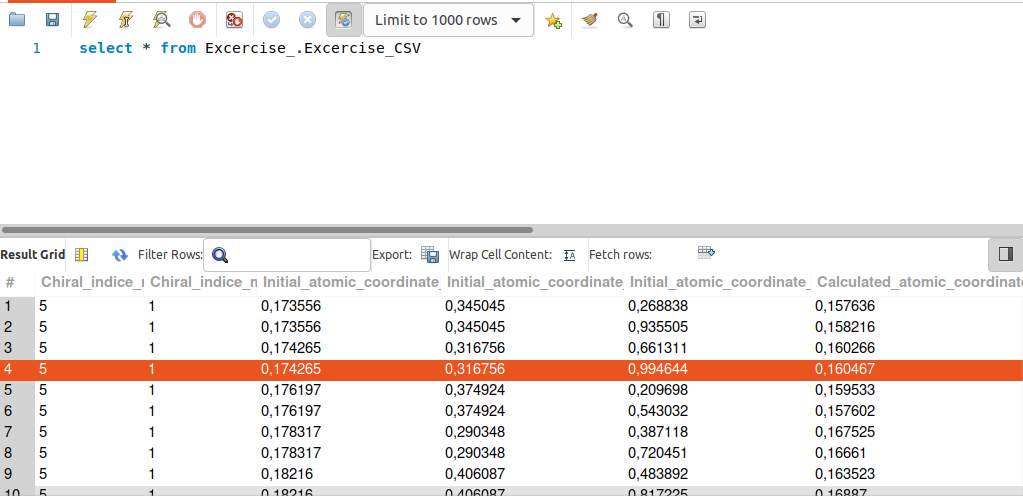